## 1. Importing libraries and dataset

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import seaborn as sns

2


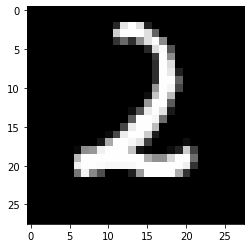

In [87]:
data = np.loadtxt("./DATA/digits2k_pixels.data.gz", ndmin=2)/255.0
data.shape = (data.shape[0], int(np.sqrt(data.shape[1])), int(np.sqrt(data.shape[1])))
labels = np.loadtxt("./DATA/digits2k_pixels.labels.gz", dtype='int')
# display:
i = 122
print(labels[i])
plt.imshow(data[i,:,:], cmap=plt.get_cmap("gray"))
plt.show()

## 2. PCA

MNIST dataset consists of 60k images, each of them is 28x28 pixels. So that gives us the dataset which has a shape of (60000, 784). It's a lot of data and proceeding on such a high dimensionality dataset can bevery time consuming. MNIST data points are embedded in 784-dimensional space, however they live in a very small subspace. We can observe it by this example.

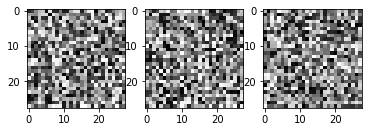

In [18]:
random1 = np.random.uniform(low=0, high=1, size=(28,28))
random2 = np.random.uniform(low=0, high=1, size=(28,28))
random3 = np.random.uniform(low=0, high=1, size=(28,28))

fig, ax = plt.subplots(1,3)
ax[0].imshow(random1, cmap=plt.get_cmap("gray"))
ax[1].imshow(random2, cmap=plt.get_cmap("gray"))
ax[2].imshow(random3, cmap=plt.get_cmap("gray"))

These images look nothing like mnist numbers - even though they both are embedded in 784 - dimensional space. That's why it is said that MNIST has a lowe dimensional strcuture. The most popular method of reducing dimension is PCA. PCA description bla bla bla.

### 2.1. Data preprocessing

Firstly, let's modify our dataset to 2-dimensional array so it has shape of (60000, 784) as it was mentioned earlier.


In [107]:
data_reshaped = data.reshape(2000, 28*28)

In order for PCA to be efficient every variable of data has to be standard scaled (mean = 0, devaiation = 1)

In [113]:
standardized_data = StandardScaler().fit_transform(data_reshaped)
sample_data = standardized_data

(2000, 784)


### 2.2. Possible dimension reduction

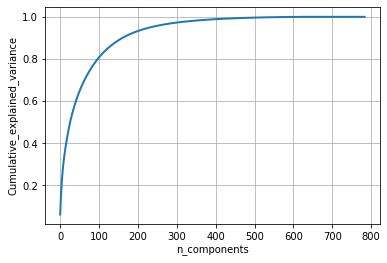

In [124]:
# initializing the pca
pca = decomposition.PCA()
pca.n_components = 784

lol = pca.fit(sample_data)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

# If we take 200-dimensions, approx. 90% of variance is expalined.


### 2.3. PCA components

Text(0.5, 0.98, '16-Component PCA')

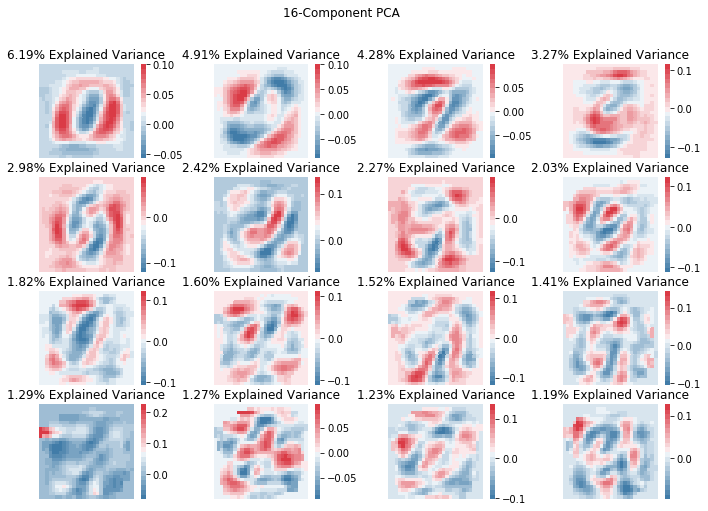

In [137]:
fig, axes = plt.subplots(4, 4, figsize=(12, 8))

k = 0
for i in range(4):
    for j in range(4):
        sns.heatmap(pca.components_[k, :].reshape(28, 28), ax = axes[i][j],
                    cmap = sns.diverging_palette(240, 10, n=20))
        axes[i][j].set_title(
            "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[k]*100),
            fontsize=12)
        axes[i][j].set_aspect('equal')
        axes[i][j].axis('off')
        k += 1


plt.suptitle('16-Component PCA')

### 2.4. PCA 2-dim visualisation

In [144]:
covar_matrix = np.matmul(sample_data.T , sample_data)
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783)(index) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))
vectors = vectors.T
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

new_coordinates = np.matmul(vectors, sample_data.T)

# appending label to the 2d projected data(vertical stack)
new_coordinates = np.vstack((new_coordinates, labels)).T
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0       3.885769       0.420347    5.0
1       6.513312      -9.226496    0.0
2      -9.116109      -2.220315    4.0
3       2.773206       7.376189    1.0
4      -3.844514       4.831797    9.0


In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np; np.random.seed(42)

# Generate data x, y for scatter and an array of images.
x = dataframe["1st_principal"]
y = dataframe["2nd_principal"]
arr = np.empty((len(x),28,28))
for i in range(len(x)):
    arr[i,:,:] = sample_data[i].reshape(28, 28)

# create figure and plot scatter
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
line = ax.scatter(x,y, c = dataframe["label"])

# create the annotations box
im = OffsetImage(arr[0,:,:], zoom=5, cmap = plt.get_cmap("gray"))
xybox=(50., 50.)
ab = AnnotationBbox(im, (0,0), xybox=xybox, xycoords='data',
        boxcoords="offset points",  pad=0.3,  arrowprops=dict(arrowstyle="->"))
# add it to the axes and make it invisible
ax.add_artist(ab)
ab.set_visible(False)

def hover(event):
    # if the mouse is over the scatter points
    if line.contains(event)[0]:
        # find out the index within the array from the event
        ind, = line.contains(event)[1]["ind"]
        # get the figure size
        w,h = fig.get_size_inches()*fig.dpi
        ws = (event.x > w/2.)*-1 + (event.x <= w/2.) 
        hs = (event.y > h/2.)*-1 + (event.y <= h/2.)
        # if event occurs in the top or right quadrant of the figure,
        # change the annotation box position relative to mouse.
        ab.xybox = (xybox[0]*ws, xybox[1]*hs)
        # make annotation box visible
        ab.set_visible(True)
        # place it at the position of the hovered scatter point
        ab.xy =(x[ind], y[ind])
        # set the image corresponding to that point
        im.set_data(arr[ind,:,:])
    else:
        #if the mouse is not over a scatter point
        ab.set_visible(False)
    fig.canvas.draw_idle()

# add callback for mouse moves
fig.canvas.mpl_connect('motion_notify_event', hover)
plt.legend()
plt.show()

NameError: name 'dataframe' is not defined

<IPython.core.display.Javascript object>


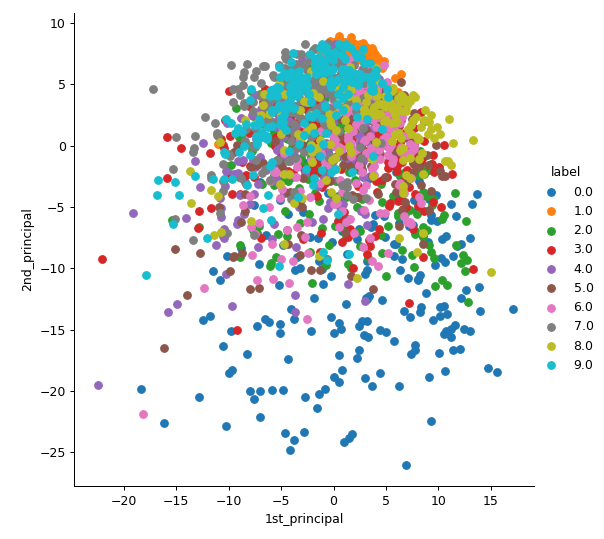

In [164]:
sns.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## 3. t-SNE approach